In [63]:
#dependencies for EDA
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#other dependencies
import datetime as dt

# 3. Production EDA

## Production Analysis
Do analysis 
- total count of:
    - strat/#unique skus
    - block/tons
    - shape/tons
    - size/tons
    - sku/tons
- check total number of years/months/cycles
- per year look at: 
    - by work_center, block, shape, size, sku

What to do with 30+ nulls in block/shape/size?

In [3]:
#Reading dataframe from cleaning.ipynb notebook
%store -r prod_reduced

##### Description of Variables

In [4]:
#description of variables
prod_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 0 to 36135
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   calendar_day                    14820 non-null  datetime64[ns]
 1   production_process              14820 non-null  category      
 2   production_process_description  14820 non-null  category      
 3   strategy                        14820 non-null  category      
 4   work_center                     13450 non-null  category      
 5   wc_description                  14820 non-null  category      
 6   block                           14815 non-null  object        
 7   shape                           14795 non-null  category      
 8   size                            14795 non-null  object        
 9   sku                             14820 non-null  object        
 10  material_description            14820 non-null  object        
 11  to

In [5]:
#What do we do with negative tons values in production? 
prod_reduced.loc[prod_reduced["ton"]<=0] #approx 2,220 are <=0 
#apparently most of these are materials that are being scraped

,calendar_day,production_process,production_process_description,strategy,work_center,wc_description,block,shape,size,sku,material_description,ton
830,2019-04-12,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X1/2,106029555,"L 5X5X1/2 GGMULTI 60'00""",-6
1051,2018-11-09,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X9/16,106019705,"L 5X5X9/16 55W 60'00""",-5
1070,2013-04-29,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5 X 3"" ANG",SHAPE_L,5X3X1/4,106022690,"L 5X3X1/4 A36/44W/A529-50 20'00""",-3
1101,2016-10-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"7 X 4"" ANG",SHAPE_L,7X4X1/2,106020742,"L 7X4X1/2 44W 20'00""",0
1472,2016-07-13,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"6 X 4"" ANG",SHAPE_L,6X4X5/16,106020608,"L 6X4X5/16 MERSPC 40'00""",-12
...,...,...,...,...,...,...,...,...,...,...,...,...
14813,2017-04-18,4310,Rolling,40.0,NaN,1302/Not assigned,"MC3"" CHN",SHAPE_MC,3 X 7.1#,106036685,"MC 3X7.1# GGMULTI 20'00""",-3
35617,2017-01-26,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,1/4 X 5,109005365,"F 1/4X5 GGMULTI 20'00""",-2
35618,2017-02-27,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,5/16 X 8,109004173,"F 5/16X8 GGMULTI 20'00""",0
35631,2019-09-23,4310,Rolling,63.0,#,1302/Not assigned,NaN,SQUARE,130 X 130MM,102300129,"BL 130X130MM MANA-8431-502_1302 2,660 SA",-1


##### Sku Count by Strategy 

In [6]:
# Count of skus by Strategy type
print(prod_reduced.groupby("strategy")["sku"].count().sort_values(ascending=False))

strategy
40.0    8566
63.0    6254
Name: sku, dtype: int64


##### Blocks Analysis

In [7]:
# Aggregate Number of tons produced by Block
totprod_by_block = prod_reduced.groupby("block")["ton"].sum().sort_values(ascending=False)
print(len(totprod_by_block))

41


###### Total tons produced by Block 2013-2019

In [18]:
#See total tons by block
print(totprod_by_block)

block
15MM               410798
20MM               270351
25MM               215253
3" ANG             176473
4" ANG             134620
2" ANG             120222
35MM               109430
2-1/2" ANG         108152
30MM               100931
6" CHN              97219
4" CHN              95525
3" CHN              84647
8" CHN              76396
3-1/2" ANG          72818
6 X 4" ANG          58871
10" CHN             55258
5" ANG              52930
4 X 3" ANG          49569
6" ANG              48886
3 X 2" ANG          45943
5 X 3-1/2" ANG      45297
5" CHN              40515
6" FLT              39053
8" FLT              36537
6 X 3-1/2" ANG      27672
5 X 3" ANG          26315
7" CHN              22447
5" FLT              16589
3-1/2X2-1/2"ANG     12096
7" FLT              11382
7 X 4" ANG          10687
9" CHN              10504
10" FLT              2354
12" CHN              1790
MC3" CHN             1585
2-1/2 X 2" ANG       1379
3 X 2-1/2" ANG       1283
16M                   508
MC4" C

In [8]:
#top 22 out of 41
top22 = totprod_by_block[:22]
#Create other categories anything less than 40K tons, bottom 19 out of 44
bottom19 = totprod_by_block[22:].sum()
bottom19 = pd.Series(bottom19)
bottom19.rename({0:"Other"}, inplace=True)

In [9]:
#join top22 + bottom19
total_blocks = top22.append(bottom19)

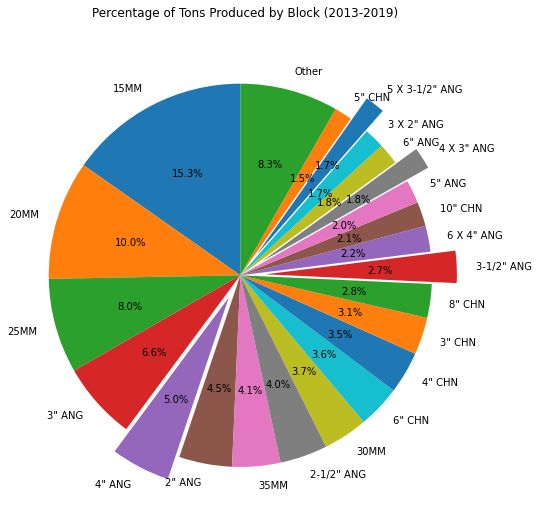

In [34]:
#PieChart by Block
fig_dims = (8,8)
fig, ax1 = plt.subplots(figsize=fig_dims)
fig.suptitle("Percentage of Tons Produced by Block (2013-2019)")
explode = [0 for block in range(23)]
explode[4] = 0.13
explode[13] = 0.13
explode[17:21] = [0.13,0,0,0.135]

#Create plot & title
ax1.pie(total_blocks, labels=total_blocks.index, autopct='%1.1f%%', shadow=False, startangle=90, explode=explode)
ax1.axis('equal')

plt.show()
#blocks near 4" ANG (requested by business): 5X3-1/2", 5X3", FT, 4X3" and 3-1/2" 

###### Total Tons produced by Year

In [137]:
#Production Blocks by Month 2013-2019
mon_prod = prod_reduced.resample("M", on="calendar_day").sum()
tot_year = mon_prod.groupby(mon_prod.index.year).sum()
tot_year = tot_year.reset_index()
tot_year
tot_year

,calendar_day,ton
0,2013,292617
1,2014,333238
2,2015,362404
3,2016,398940
4,2017,427469
5,2018,440660
6,2019,437550


Text(0.5, 0, 'Tons')

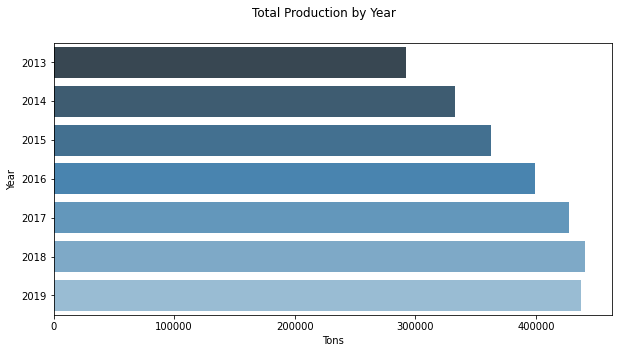

In [155]:
#put into bar chart

#set fig
fig_dims = (10,5)
fig, ax =plt.subplots(figsize=fig_dims)
fig.suptitle("Total Production by Year")

#countplot
sns.barplot(y="calendar_day", x="ton", data=tot_year, ax=ax, orient="h", palette="Blues_d")
ax.set_ylabel("Year")
ax.set_xlabel("Tons")

###### Variation of Tons Produced Overtime

Text(0, 0.5, 'Tons')

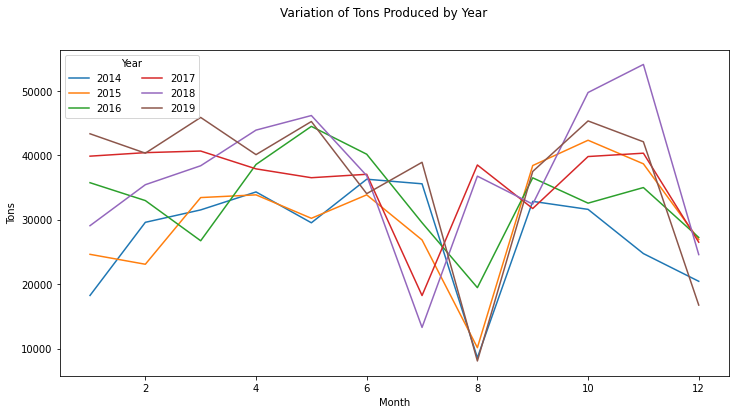

In [56]:
#create month plots by year
year_2013 = mon_prod[mon_prod.index.year == 2013]
year_2014 = mon_prod[mon_prod.index.year == 2014]
year_2015 = mon_prod[mon_prod.index.year == 2015]
year_2016 = mon_prod[mon_prod.index.year == 2016]
year_2017 = mon_prod[mon_prod.index.year == 2017]
year_2018 = mon_prod[mon_prod.index.year == 2018]
year_2019 = mon_prod[mon_prod.index.year == 2019]


#Create figure and plots
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Variation of Tons Produced by Year")


ax.plot(year_2014.index.month, year_2014["ton"], label=2014)
ax.plot(year_2015.index.month, year_2015["ton"], label=2015)
ax.plot(year_2016.index.month, year_2016["ton"], label=2016)
ax.plot(year_2017.index.month, year_2017["ton"], label=2017)
ax.plot(year_2018.index.month, year_2018["ton"], label=2018)
ax.plot(year_2019.index.month, year_2019["ton"], label=2019)
#Create legend & axis names
plt.legend(loc="best", title="Year", ncol=2)
ax.set_xlabel("Month")
ax.set_ylabel("Tons")

#Remove shutdowns?, ask about shutdowns, also what happened 2016 week 13
#try to normalize and come up with a range

##### Monthly Distribution of Production

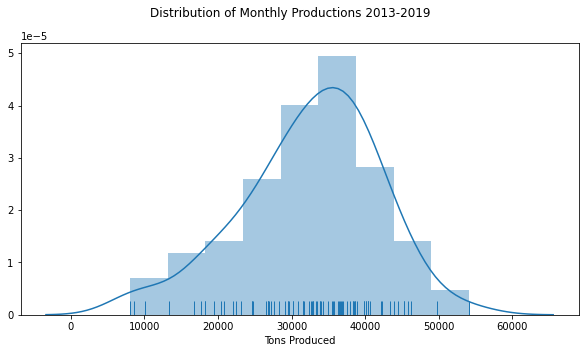

In [157]:
#Monthly Production Distribution

#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Monthly Productions 2013-2019")
#Plotting fig
sns.distplot(mon_prod, rug=True, axlabel="Tons Produced", ax=ax)

In [156]:
#Stats of Distribution
print("Statistics of Monthly Production")
print(mon_prod.describe())
print("Skew measure:", sp.stats.skew(mon_prod))
print("Kurtosis measure:", sp.stats.kurtosis(mon_prod, fisher=False))

Statistics of Monthly Production
                ton
count     83.000000
mean   32444.313253
std     9290.715004
min     8071.000000
25%    26892.500000
50%    33435.000000
75%    38621.500000
max    54095.000000
Skew measure: [-0.51088829]
Kurtosis measure: [3.16485642]


In [14]:
#aggregate by year and block
block_prod = prod_reduced.groupby(["calendar_day","block"]).sum()

In [15]:
#Count of productions by block
block_prod = block_prod.reset_index()["block"].value_counts()
print(block_prod)
print("Number of productions by unique blocks: ", block_prod.nunique())

15MM               513
20MM               340
25MM               291
2" ANG             290
3" ANG             286
2-1/2" ANG         251
4" ANG             242
4" CHN             230
6" CHN             219
3" CHN             213
3 X 2" ANG         195
3-1/2" ANG         183
35MM               176
8" CHN             174
4 X 3" ANG         164
30MM               161
6 X 4" ANG         153
10" CHN            151
5" CHN             142
5" ANG             138
6" ANG             137
5 X 3-1/2" ANG     132
6 X 3-1/2" ANG     118
6" FLT             117
5 X 3" ANG          99
8" FLT              96
7" CHN              75
3-1/2X2-1/2"ANG     61
5" FLT              60
7 X 4" ANG          50
7" FLT              39
9" CHN              37
12" CHN             23
MC3" CHN            17
MC4" CHN            15
2-1/2 X 2" ANG      10
3 X 2-1/2" ANG       9
10" FLT              8
TRN                  3
35M                  2
16M                  2
Name: block, dtype: int64
Number of Unique blocks:  40


#### Size Analysis

In [16]:
# Aggregate Number of tons produced by Size
print(prod_reduced.groupby("size")["ton"].sum().sort_values(ascending=False))

size
15M             408496
20M             269050
25M             184577
35M             109430
30M              99698
                 ...  
130 X 130MM         -1
2 1/2X2X5/16        -1
8X8X3/4             -1
1/4 X 8             -2
1/4 X 5             -2
Name: ton, Length: 175, dtype: int64


#### Sku Analysis

In [40]:
# Aggregate Number of tons produced by SKU
prodby_sku = prod_reduced.groupby(["sku","material_description"])["ton"].sum().sort_values(ascending=False)
print(prodby_sku)

sku        material_description    
110001535  RB 15MM 400W 18M 00CM       212589
110001860  RB 20MM 400W 18M 00CM       129563
110001535  RB 15M 400W 18M 00CM        127213
110001773  RB 25MM 400W 18M 00CM       112637
110001860  RB 20M 400W 18M 00CM         57169
                                        ...  
106020403  C 4X7.25# 44W 40'00"            -9
106020373  C 5X5.4# A529-50 20'00"         -9
106020344  C 4X5.4# 44W/50W 40'00"        -16
110002040  DELETED DO NOT USE             -57
106021918  L 2X2X1/8 44W/50W 40'00"       -69
Name: ton, Length: 1911, dtype: int64
